In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##  Application Data CSV

### Step 1: Reading the data

In [3]:
# Loading only the desired columns which might affect the Target value
appln_data = pd.read_csv("application_data.csv",usecols = ["SK_ID_CURR","TARGET","NAME_CONTRACT_TYPE","CODE_GENDER",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"CNT_CHILDREN",
"AMT_INCOME_TOTAL",
"AMT_CREDIT",
"AMT_ANNUITY",
"AMT_GOODS_PRICE",                                                     
"NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE",                                                          
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"DAYS_BIRTH",
"OCCUPATION_TYPE",
"CNT_FAM_MEMBERS",
"ORGANIZATION_TYPE",
"APARTMENTS_AVG"                                                       
])
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,APARTMENTS_AVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,Laborers,1.0,Business Entity Type 3,0.0247
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,Core staff,2.0,School,0.0959
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,Laborers,1.0,Government,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,Laborers,2.0,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,Core staff,1.0,Religion,NaN


In [4]:
# Checking the shape of Application Data loaded
appln_data.shape

(307511, 20)

In [5]:
# Checking the info of all columns in Application Data 
appln_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  NAME_EDUCATION_TYPE  307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
 15  DAYS_BIRTH       

In [6]:
# Checking the stats of all numerical columns in Application Data 
appln_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_FAM_MEMBERS,APARTMENTS_AVG
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307509.000000,151450.00000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,2.152665,0.11744
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,0.910682,0.10824
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,1.000000,0.00000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,2.000000,0.05770
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,2.000000,0.08760
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,3.000000,0.14850
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,20.000000,1.00000


### Step 2: Finding Missing Values

In [7]:
# Checking the count of Null values in each column
appln_data.isnull().sum()

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                12
AMT_GOODS_PRICE           278
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
OCCUPATION_TYPE         96391
CNT_FAM_MEMBERS             2
ORGANIZATION_TYPE           0
APARTMENTS_AVG         156061
dtype: int64

In [8]:
# Checking the % of Null values in each column
appln_data.isnull().mean().round(8) * 100

SK_ID_CURR              0.000000
TARGET                  0.000000
NAME_CONTRACT_TYPE      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
AMT_CREDIT              0.000000
AMT_ANNUITY             0.003902
AMT_GOODS_PRICE         0.090403
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
OCCUPATION_TYPE        31.345545
CNT_FAM_MEMBERS         0.000650
ORGANIZATION_TYPE       0.000000
APARTMENTS_AVG         50.749729
dtype: float64

##### Inference 1 - There is only 1 column "APARTMENTS_AVG" having Null values greater than 50%. Therefore, will have to drop this column from Dataframe.<br><br> Inference 2 - Thare are 3 columns having small % (ie less than 13%) of Null values - "AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_FAM_MEMBERS" . Since the number of Null values is significantly low then we can impute them with 0 thus will not affect the final result.<br><br> Inference 3 - There is only 1 column "OCCUPATION_TYPE" which lies in the range of 13-50% of Null values. Since the Null values are in moderate range, we can't neither impute the Null values with most popular category nor drop the whole column, It's also a categorical column, we can mark the Null values with "NA" value and create a separate category for Null values.

In [9]:
# Dropping column "APARTMENTS_AVG" from Dataframe
appln_data = appln_data.drop(['APARTMENTS_AVG'], axis=1)

In [10]:
# Checking the shape of updated Application Data Dataframe
appln_data.shape

(307511, 19)

### Step 3: Checking Datatypes

In [11]:
# Checking Datatypes of each column
appln_data.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
ORGANIZATION_TYPE       object
dtype: object

In [12]:
# Changing Datatype of column "SK_ID_CURR" as it is an Id column and will not be used for mathematical calculations
appln_data['SK_ID_CURR'] = appln_data['SK_ID_CURR'].astype(object)

In [13]:
# Column "DAYS_BIRTH" has negative values and the values are also in days. Converting them in years and absolute.
appln_data.DAYS_BIRTH = appln_data.DAYS_BIRTH.apply(lambda x: int(x)/365 if x>0 else int(abs(x)/365))

In [14]:
# Printing the data after making changes
appln_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,Core staff,1.0,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,25,Sales staff,1.0,Services
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,56,NaN,1.0,XNA
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,41,Managers,1.0,School
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,32,Laborers,2.0,Business Entity Type 1


### Step 4: Finding Outliers Values

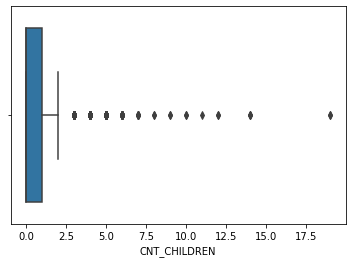

In [15]:
# Checking Outliers in column "CNT_CHILDREN"
sns.boxplot(appln_data.CNT_CHILDREN)
plt.show()

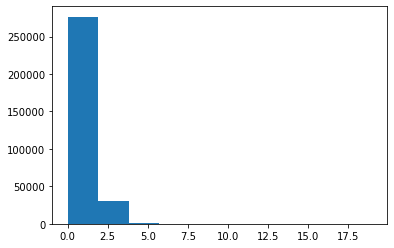

In [16]:
plt.hist(appln_data.CNT_CHILDREN)
plt.show()

##### Inference 4 - Clearly it is shown using Boxplot, outliers exist in column "CNT_CHILDREN". Using hist plot, we can say that outliers can be removed by filtering the data ie keeping the data upto a certain number (say 5) as the frequence of data having children more than 5 is very less comparetively.

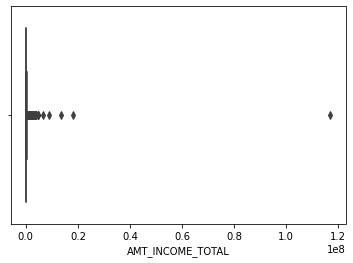

In [17]:
# Checking Outliers in column "AMT_INCOME_TOTAL"
sns.boxplot(appln_data.AMT_INCOME_TOTAL)
plt.show()

In [18]:
appln_data.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99,1])

0.50       147150.0
0.70       180000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

##### Inference 5 - Clearly it is shown using Boxplot and calculating quantiles, outliers exist in column "AMT_INCOME_TOTAL". Outliers can be removed by filtering the data ie keeping the data upto a certain number (say 95 percentile). Above it, there is much variation in data.

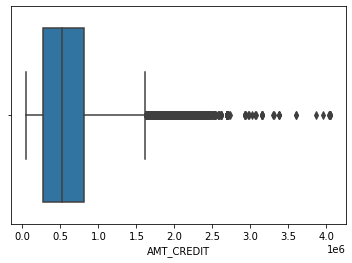

In [19]:
# Checking Outliers in column "AMT_CREDIT"
sns.boxplot(appln_data.AMT_CREDIT)
plt.show()

In [20]:
appln_data.AMT_CREDIT.quantile([0.5, 0.7, 0.9, 0.95, 0.99,1])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

##### Inference 6 - Clearly it is shown using Boxplot and calculating quantiles, outliers exist in column "AMT_CREDIT". Outliers can be removed by filtering the data ie keeping the data upto a certain number (say 90 percentile). Above it, there is much variation in data.

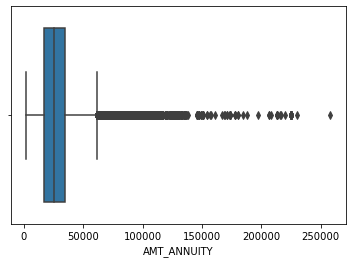

In [21]:
# Checking Outliers in column "AMT_ANNUITY"
sns.boxplot(appln_data.AMT_ANNUITY)
plt.show()

In [22]:
appln_data.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95, 0.99,1])

0.50     24903.0
0.70     32004.0
0.90     45954.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

##### Inference 7 - Clearly it is shown using Boxplot and calculating quantiles, outliers exist in column "AMT_ANNUITY". Outliers can be removed by filtering the data ie keeping the data upto a certain number (say 95 percentile). Above it, there is much variation in data.

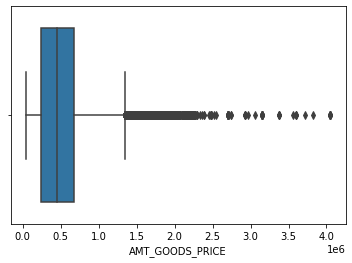

In [23]:
# Checking Outliers in column "AMT_GOODS_PRICE"
sns.boxplot(appln_data.AMT_GOODS_PRICE)
plt.show()

In [24]:
appln_data.AMT_GOODS_PRICE.quantile([0.5, 0.7, 0.9, 0.95, 0.99,1])

0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

##### Inference 8 - Clearly it is shown using Boxplot and calculating quantiles, outliers exist in column "AMT_GOODS_PRICE". Outliers can be removed by filtering the data ie keeping the data upto a certain number (say 90 percentile). Above it, there is much variation in data.

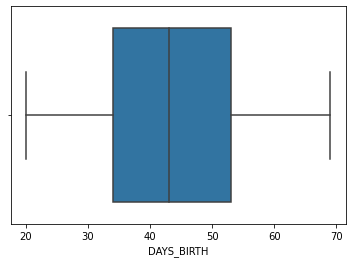

In [25]:
# Checking Outliers in column "DAYS_BIRTH"
sns.boxplot(appln_data.DAYS_BIRTH)
plt.show()

##### Inference 9 - There are no outliers in column "DAYS_BIRTH"

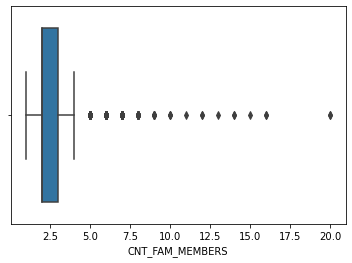

In [26]:
# Checking Outliers in column "CNT_FAM_MEMBERS"
sns.boxplot(appln_data.CNT_FAM_MEMBERS)
plt.show()

##### Inference 10 - Clearly, there are outliers in the column "CNT_FAM_MEMBERS" which can be treated by filtering the extreme values.

### Step 5: Check Data Imbalance

In [27]:
# Check data imbalance in column "TARGET"
appln_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

##### Inference 11 - We can clearly see there is a huge data imbalace in column "TARGET". <br> Value 0 ie Non Defaulters are high in number (92% approx) as compared to Value 1 ie Defaulters which are only (8%). <br> Treatment - It can be fixed by using random sampling method ie selecting the data at random instead of using population data.

### Step 6: Bifurcation of Dataframe

In [28]:
# Printing the Application DF
appln_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,Core staff,1.0,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,25,Sales staff,1.0,Services
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,56,NaN,1.0,XNA
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,41,Managers,1.0,School
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,32,Laborers,2.0,Business Entity Type 1


In [29]:
# Bifurcating the Application DF into 2 DF ie Defaulters data and Non-Defaulters data
appln_data_defaulters = appln_data[appln_data['TARGET']==1]
appln_data_non_defaulters = appln_data[appln_data['TARGET']==0]

In [30]:
# Printing the Defaulters Data
appln_data_defaulters

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,Laborers,1.0,Business Entity Type 3
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,51,Cooking staff,1.0,Business Entity Type 3
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,47,Laborers,2.0,Business Entity Type 3
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,36,Sales staff,2.0,Self-employed
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,67,NaN,2.0,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Working,Secondary / secondary special,Married,House / apartment,27,Laborers,3.0,Business Entity Type 3
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Working,Higher education,Civil marriage,House / apartment,36,Laborers,3.0,Construction
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Working,Secondary / secondary special,Married,House / apartment,56,Managers,2.0,Business Entity Type 3
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,45,Sales staff,2.0,Business Entity Type 3


In [31]:
# Printing the Non Defaulters Data
appln_data_non_defaulters

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,Core staff,1.0,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,46,Laborers,2.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,66,NaN,1.0,XNA
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,25,Sales staff,1.0,Services
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,56,NaN,1.0,XNA
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,41,Managers,1.0,School


In [32]:
# Shape of Defaulters dataframe
appln_data_defaulters.shape

(24825, 19)

In [33]:
# Shape of Non-Defaulters dataframe
appln_data_non_defaulters.shape

(282686, 19)

### Step 7: Univariate Analysis

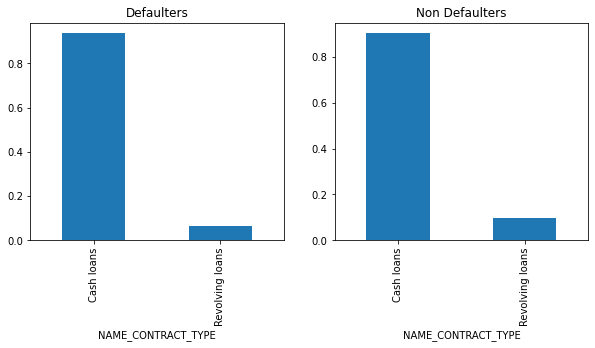

In [34]:
# Analysis of column "NAME_CONTRACT_TYPE"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_CONTRACT_TYPE")
appln_data_defaulters.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_CONTRACT_TYPE")
appln_data_non_defaulters.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 12 - As clearly shown, there is not much difference between Defaulters and Non-Defaulters in terms of "NAME_CONTRACT_TYPE"

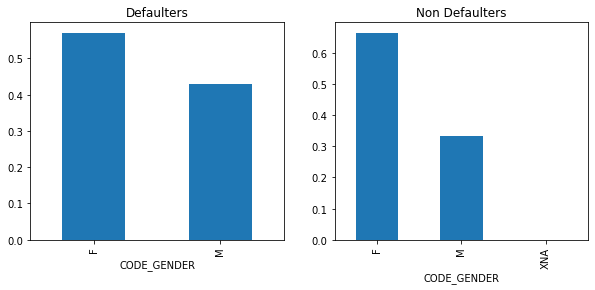

In [35]:
# Analysis of column "CODE_GENDER"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("CODE_GENDER")
appln_data_defaulters.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("CODE_GENDER")
appln_data_non_defaulters.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 13 - Based on our analysis we can conclude that, Female Defaulters are more than Male Defaulters but less than Female Non Defaulters.

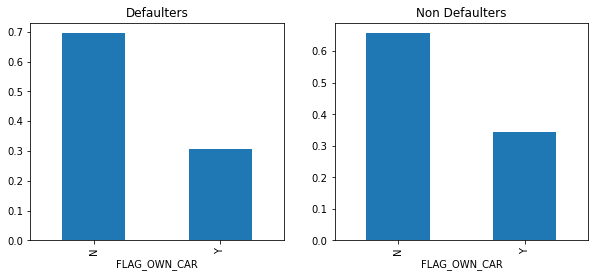

In [36]:
# Analysis of column "FLAG_OWN_CAR"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("FLAG_OWN_CAR")
appln_data_defaulters.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("FLAG_OWN_CAR")
appln_data_non_defaulters.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 14 - Based on our analysis we can conclude that, People who do not own car are more likely to default than those who own a car. Similar pattern can be observed in case of Non Defaulters.

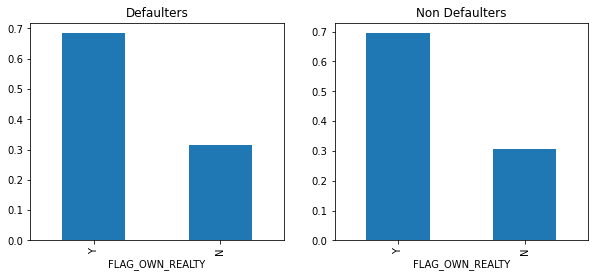

In [37]:
# Analysis of column "FLAG_OWN_REALTY"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("FLAG_OWN_REALTY")
appln_data_defaulters.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("FLAG_OWN_REALTY")
appln_data_non_defaulters.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 15 - Based on our analysis we can conclude that, People who own realty are more likely to default than those who don't own a realty. Similar pattern can be observed in case of Non Defaulters.

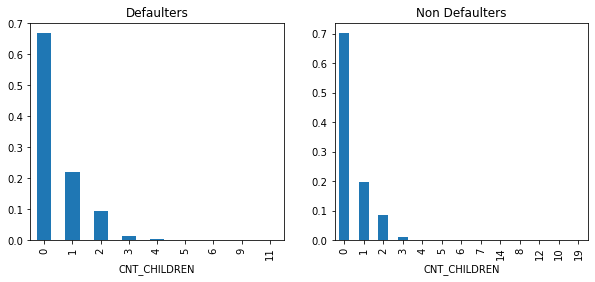

In [38]:
# Analysis of column "CNT_CHILDREN"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("CNT_CHILDREN")
appln_data_defaulters.CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("CNT_CHILDREN")
appln_data_non_defaulters.CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 15 - We got an interesting insight!! As per analysis, There is an inverse relationship between count of children and Defaulters as well as Non Defaulters

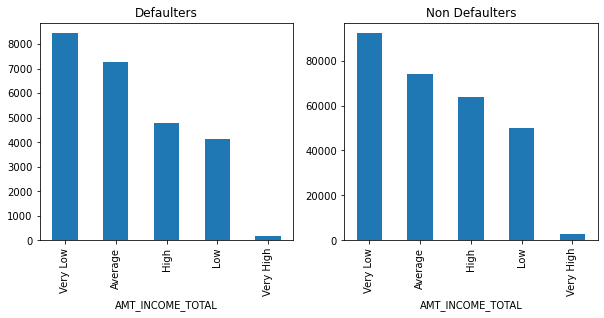

In [39]:
# Analysis of column "AMT_INCOME_TOTAL"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("AMT_INCOME_TOTAL")
pd.qcut(appln_data_defaulters['AMT_INCOME_TOTAL'],q=[0, .25, .50, .75, 0.99, 1],labels=['Very Low', 'Low', 'Average', 'High', 'Very High']).value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("AMT_INCOME_TOTAL")
pd.qcut(appln_data_non_defaulters['AMT_INCOME_TOTAL'],q=[0, .25, .50, .75, 0.99, 1],labels=['Very Low', 'Low', 'Average', 'High', 'Very High']).value_counts().plot(kind='bar')
plt.show()

##### Inference 16 - Based on our analysis we can conclude that, People who have very low income are more likely to default than who have higher income.

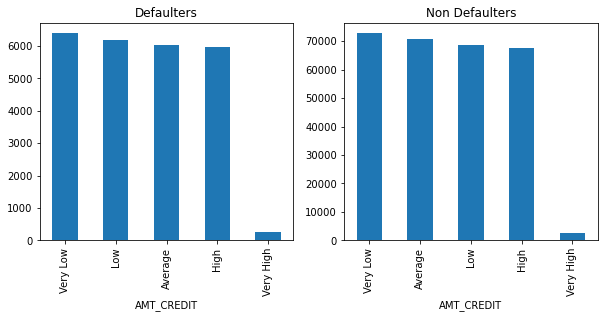

In [40]:
# Analysis of column "AMT_CREDIT"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("AMT_CREDIT")
pd.qcut(appln_data_defaulters['AMT_CREDIT'],q=[0, .25, .50, .75, 0.99, 1],labels=['Very Low', 'Low', 'Average', 'High', 'Very High']).value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("AMT_CREDIT")
pd.qcut(appln_data_non_defaulters['AMT_CREDIT'],q=[0, .25, .50, .75, 0.99, 1],labels=['Very Low', 'Low', 'Average', 'High', 'Very High']).value_counts().plot(kind='bar')
plt.show()

##### Inference 17 - Based on our analysis we can conclude that, People took very low amount of loan are more likely to default than who have took high amount of loan

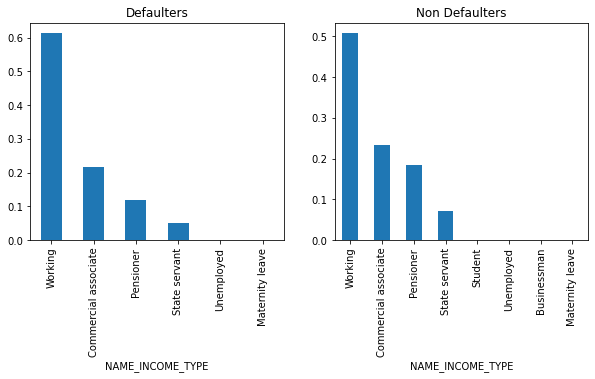

In [41]:
# Analysis of column "NAME_INCOME_TYPE"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_INCOME_TYPE")
appln_data_defaulters.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_INCOME_TYPE")
appln_data_non_defaulters.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 18 - Based on our analysis we can conclude that, Working class people are likely to default mostly, Similar pattern can be observed in Non Defaulters.

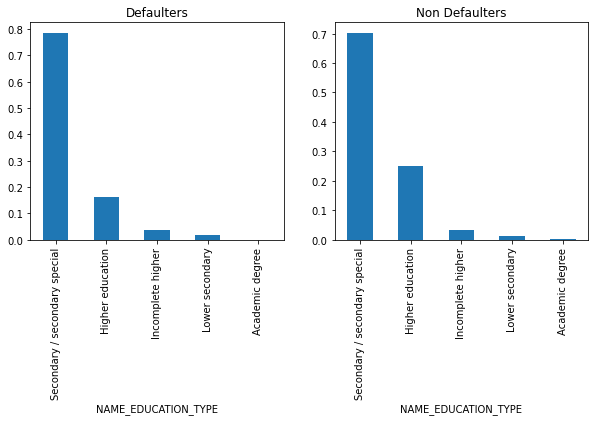

In [42]:
# Analysis of column "NAME_EDUCATION_TYPE"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_EDUCATION_TYPE")
appln_data_defaulters.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_EDUCATION_TYPE")
appln_data_non_defaulters.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 19 - Based on our analysis we can conclude that, People who have education upto higher education are less likely to default.

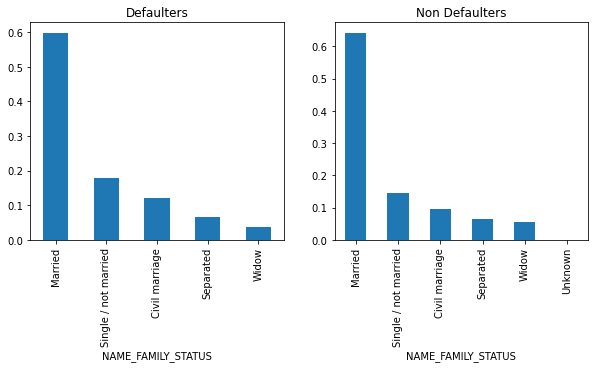

In [43]:
# Analysis of column "NAME_FAMILY_STATUS"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_FAMILY_STATUS")
appln_data_defaulters.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_FAMILY_STATUS")
appln_data_non_defaulters.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 20 - Based on our analysis we can conclude that, Married people are more likely to default than other.

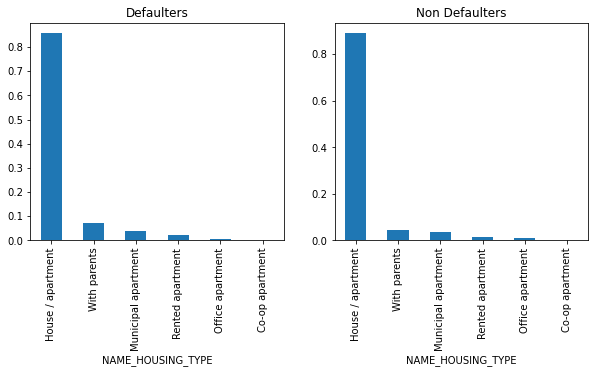

In [44]:
# Analysis of column "NAME_HOUSING_TYPE"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_HOUSING_TYPE")
appln_data_defaulters.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_HOUSING_TYPE")
appln_data_non_defaulters.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 21 - Based on our analysis we can conclude that, People who live in house or apartment are more likely to default than other.

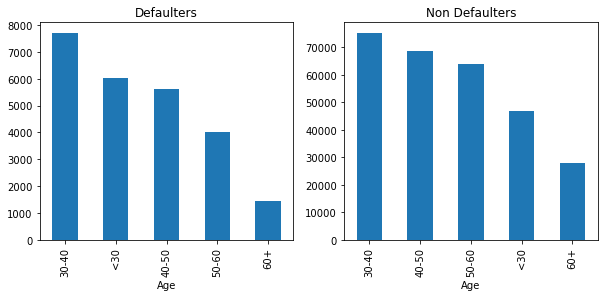

In [45]:
# Analysis of column "DAYS_BIRTH"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("Age")
pd.cut(appln_data_defaulters.DAYS_BIRTH, [0,30,40,50,60,999], labels=["<30","30-40","40-50","50-60","60+"]).value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("Age")
pd.cut(appln_data_non_defaulters.DAYS_BIRTH, [0,30,40,50,60,999], labels=["<30","30-40","40-50","50-60","60+"]).value_counts().plot(kind='bar')
plt.show()

##### Inference 22 - Based on our analysis we can conclude that, People who have age b/w 30-40 have maximum frequncy in both Defaulters and Non Defaulters.

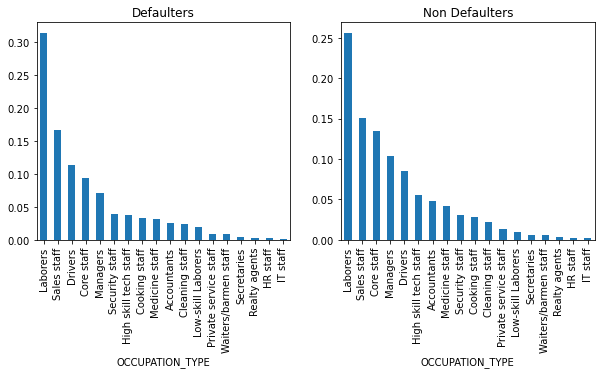

In [46]:
# Analysis of column "OCCUPATION_TYPE"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("OCCUPATION_TYPE")
appln_data_defaulters.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("OCCUPATION_TYPE")
appln_data_non_defaulters.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 23 - Based on our analysis we can conclude that, People who work as Laborer have highest frequency.

### Step 7: Bivariate Analysis

In [47]:
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,Core staff,1.0,Religion


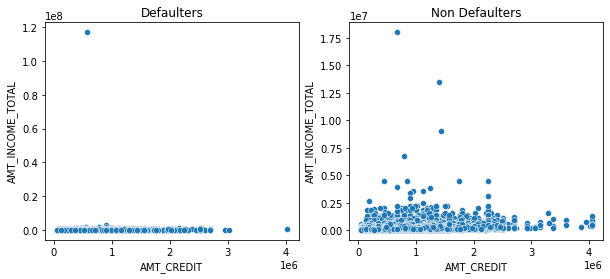

In [48]:
# Analysis of column "AMT_INCOME_TOTAL" and "AMT_CREDIT"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_INCOME_TOTAL")
sns.scatterplot(appln_data_defaulters.AMT_CREDIT,appln_data_defaulters.AMT_INCOME_TOTAL)
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_INCOME_TOTAL")
sns.scatterplot(appln_data_non_defaulters.AMT_CREDIT,appln_data_non_defaulters.AMT_INCOME_TOTAL)
plt.show()

##### Inference 24 - There is no clear evidence to reach any conclusion

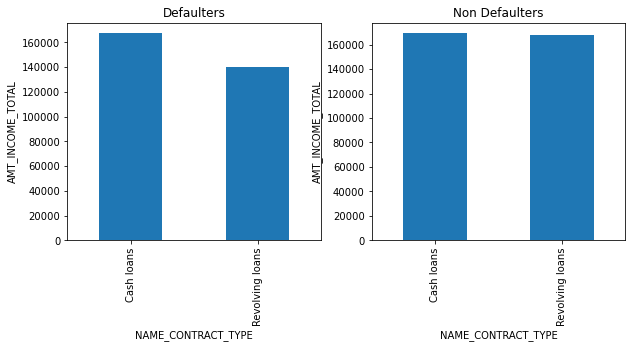

In [49]:
# Analysis of column "NAME_CONTRACT_TYPE" and "AMT_INCOME_TOTAL"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_defaulters.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_non_defaulters.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

##### Inference 24 - Based on our analysis we can conclude that, People who have higher income are more likely to default who took cash loans as compared to revolving loans.

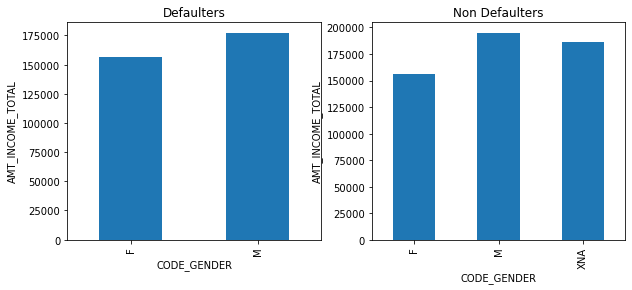

In [50]:
# Analysis of column "CODE_GENDER" and "AMT_INCOME_TOTAL"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("CODE_GENDER")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_defaulters.groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("CODE_GENDER")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_non_defaulters.groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

##### Inference 25 - Based on our analysis we can conclude that, Male with higher income are more likely to default than Female.

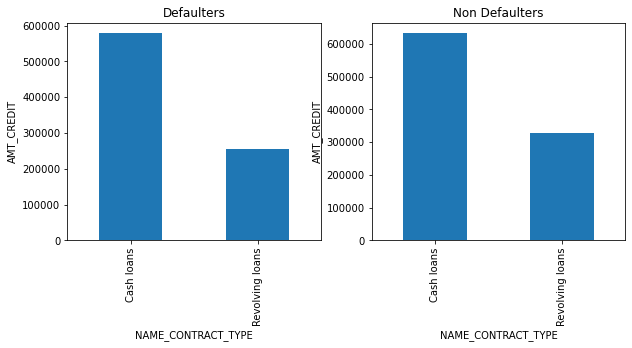

In [51]:
# Analysis of column "NAME_CONTRACT_TYPE" and "AMT_CREDIT"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_CREDIT")
appln_data_defaulters.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_CREDIT")
appln_data_non_defaulters.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.show()

##### Inference 25 - Based on our analysis we can conclude that, People with took high amount of credit as cash loans are more likely to default as compared to revolving loans

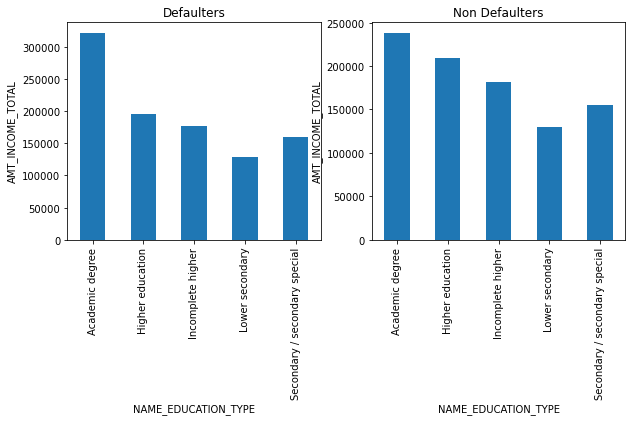

In [52]:
# Analysis of column "NAME_EDUCATION_TYPE" and "AMT_INCOME_TOTAL"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_defaulters.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_non_defaulters.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

##### Inference 26 - Based on our analysis we can conclude that, People with "Academic degree" out perform other categories with respect to both aspects

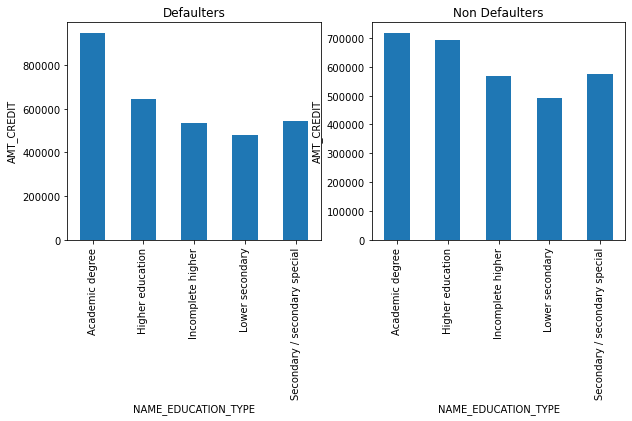

In [53]:
# Analysis of column "NAME_EDUCATION_TYPE" and "AMT_CREDIT"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_CREDIT")
appln_data_defaulters.groupby("NAME_EDUCATION_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_CREDIT")
appln_data_non_defaulters.groupby("NAME_EDUCATION_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.show()

##### Inference 27 - Based on our analysis we can conclude that, People with "Academic degree" out perform other categories with respect to both aspects

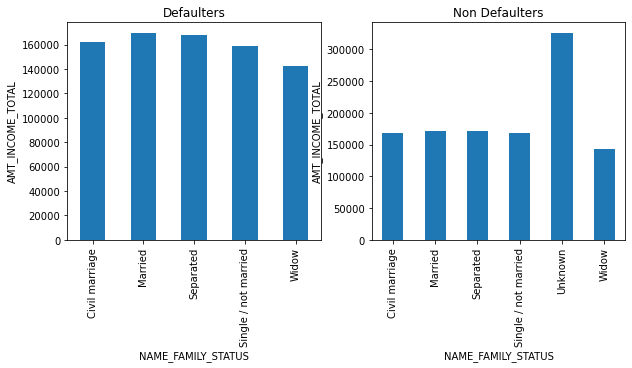

In [54]:
# Analysis of column "NAME_FAMILY_STATUS" and "AMT_INCOME_TOTAL"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_defaulters.groupby("NAME_FAMILY_STATUS")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_non_defaulters.groupby("NAME_FAMILY_STATUS")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

##### Inference 28 - There is no clear distinction between groups of "NAME_FAMILY_STATUS"  in terms of income for both Defaulters and Non Defaulters

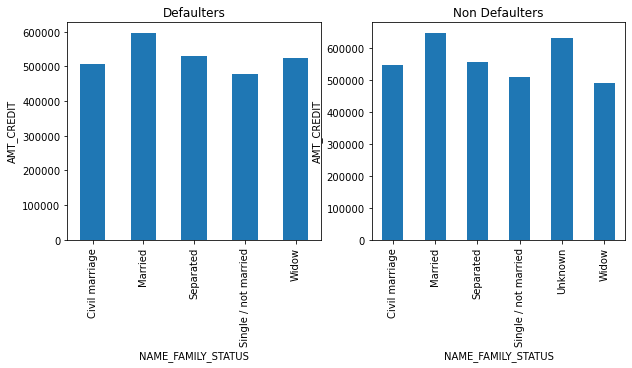

In [55]:
# Analysis of column "NAME_FAMILY_STATUS" and "AMT_CREDIT"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("AMT_CREDIT")
appln_data_defaulters.groupby("NAME_FAMILY_STATUS")["AMT_CREDIT"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("AMT_CREDIT")
appln_data_non_defaulters.groupby("NAME_FAMILY_STATUS")["AMT_CREDIT"].mean().plot.bar()
plt.show()

##### Inference 29 - Based on our analysis we can conclude that, Married People who took high amount of loan are more likely to default where as Single People are least likely to default comparetively. Similar pattern can be observed for Non Defaulters.

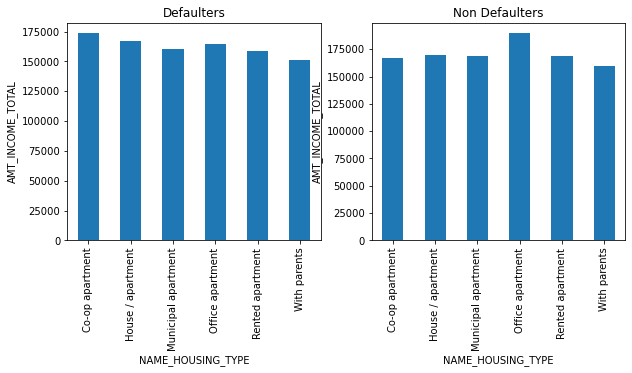

In [56]:
# Analysis of column "NAME_HOUSING_TYPE" and "AMT_INCOME_TOTAL"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_defaulters.groupby("NAME_HOUSING_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_non_defaulters.groupby("NAME_HOUSING_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

##### Inference 30 - Based on our analysis we can conclude that, People who live in "Co-op apartment" and have high income are more likely to default whereas people who live with their parents and also comparetively have less income are least likely to default.

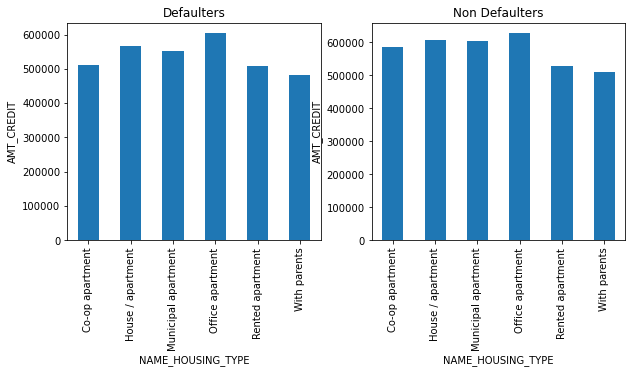

In [57]:
# Analysis of column "NAME_HOUSING_TYPE" and "AMT_CREDIT"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("AMT_CREDIT")
appln_data_defaulters.groupby("NAME_HOUSING_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("AMT_CREDIT")
appln_data_non_defaulters.groupby("NAME_HOUSING_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.show()

##### Inference 31 - Based on our analysis we can conclude that, People who live in "Office apartment" and took high amount of loan are more likely to default whereas people who live with their parents and also comparetively took less amount of loan are least likely to default.

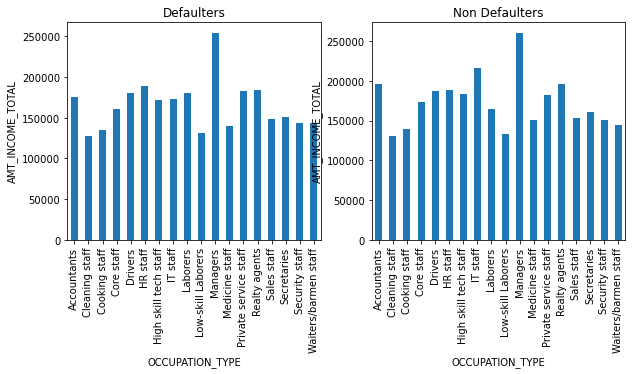

In [58]:
# Analysis of column "OCCUPATION_TYPE" and "AMT_INCOME_TOTAL"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_defaulters.groupby("OCCUPATION_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
appln_data_non_defaulters.groupby("OCCUPATION_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

##### Inference 32 - Based on our analysis we can conclude that, People who work as "IT staff" and have high income are less likely to default as compared to other occupation categories.

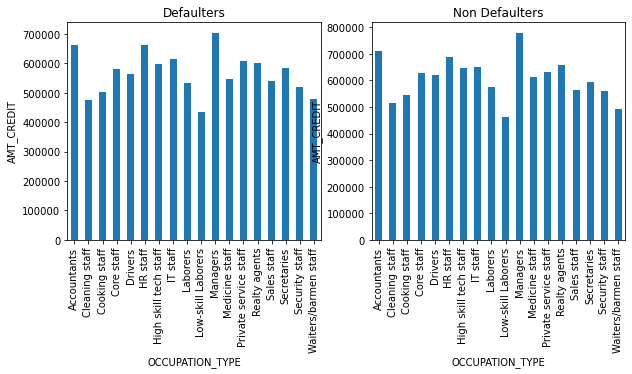

In [59]:
# Analysis of column "OCCUPATION_TYPE" and "AMT_CREDIT"
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("AMT_CREDIT")
appln_data_defaulters.groupby("OCCUPATION_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title("Non Defaulters")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("AMT_CREDIT")
appln_data_non_defaulters.groupby("OCCUPATION_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.show()

##### Inference 33 - There is no clear distinction between groups of "OCCUPATION_TYPE"  in terms of amount of loan took for both Defaulters and Non Defaulters

### Step 8: Multivariate Analysis

In [60]:
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,Core staff,1.0,Religion


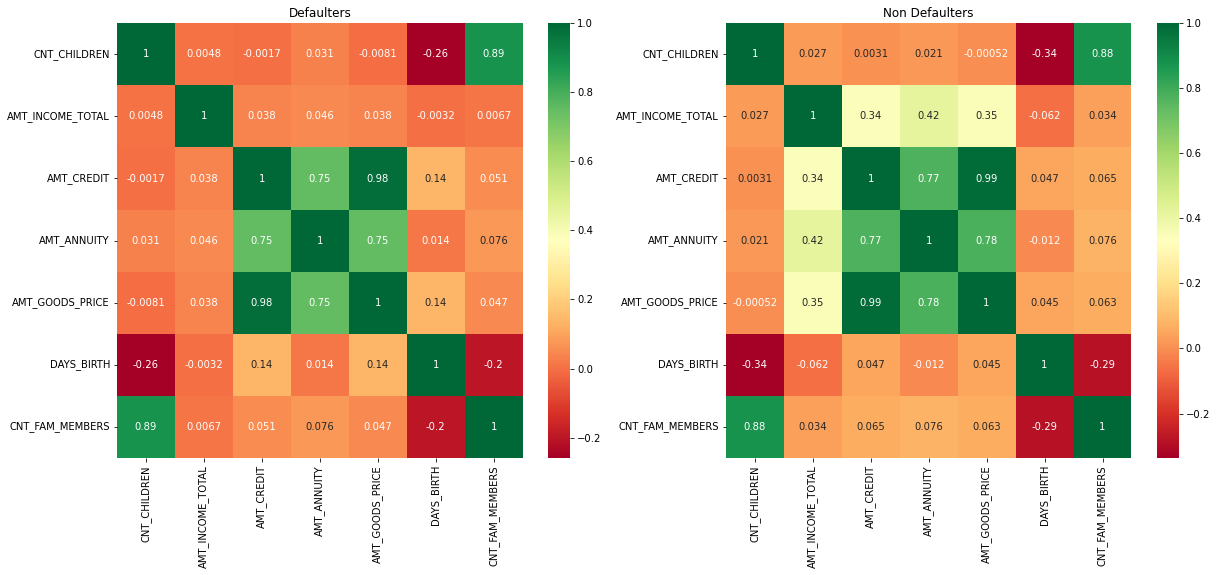

In [61]:
# Plotting heatmap b/w all numerical columns
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.heatmap(appln_data_defaulters[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","CNT_FAM_MEMBERS"]].corr(),annot=True,cmap="RdYlGn")
plt.subplot(1,2,2)
plt.title("Non Defaulters")
sns.heatmap(appln_data_non_defaulters[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","CNT_FAM_MEMBERS"]].corr(),annot=True,cmap="RdYlGn")
plt.show()

##### Inference 34 - AMT_ANNUITY and AMT_CREDIT, AMT_GOODS_PRICE and AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY have high liner dependence whereas DAYS_BIRTH and CNT_CHILDREN and DAYS_BIRTH and CNT_FAMILY_MEMBERS follow inverse relationship.

In [62]:
# Creating Pivots b/w column "NAME_INCOME_TYPE" and "NAME_EDUCATION_TYPE" with value "AMT_INCOME_TOTAL"
res_1 = pd.pivot_table(data=appln_data_defaulters,index="NAME_INCOME_TYPE",columns="NAME_EDUCATION_TYPE",values="AMT_INCOME_TOTAL",aggfunc="mean")
res_3 = pd.pivot_table(data=appln_data_non_defaulters,index="NAME_INCOME_TYPE",columns="NAME_EDUCATION_TYPE",values="AMT_INCOME_TOTAL",aggfunc="mean")
# Creating Pivots b/w column "NAME_INCOME_TYPE" and "NAME_EDUCATION_TYPE" with value "AMT_CREDIT"
res_2 = pd.pivot_table(data=appln_data_defaulters,index="NAME_INCOME_TYPE",columns="NAME_EDUCATION_TYPE",values="AMT_CREDIT",aggfunc="mean")
res_4 = pd.pivot_table(data=appln_data_non_defaulters,index="NAME_INCOME_TYPE",columns="NAME_EDUCATION_TYPE",values="AMT_CREDIT",aggfunc="mean")

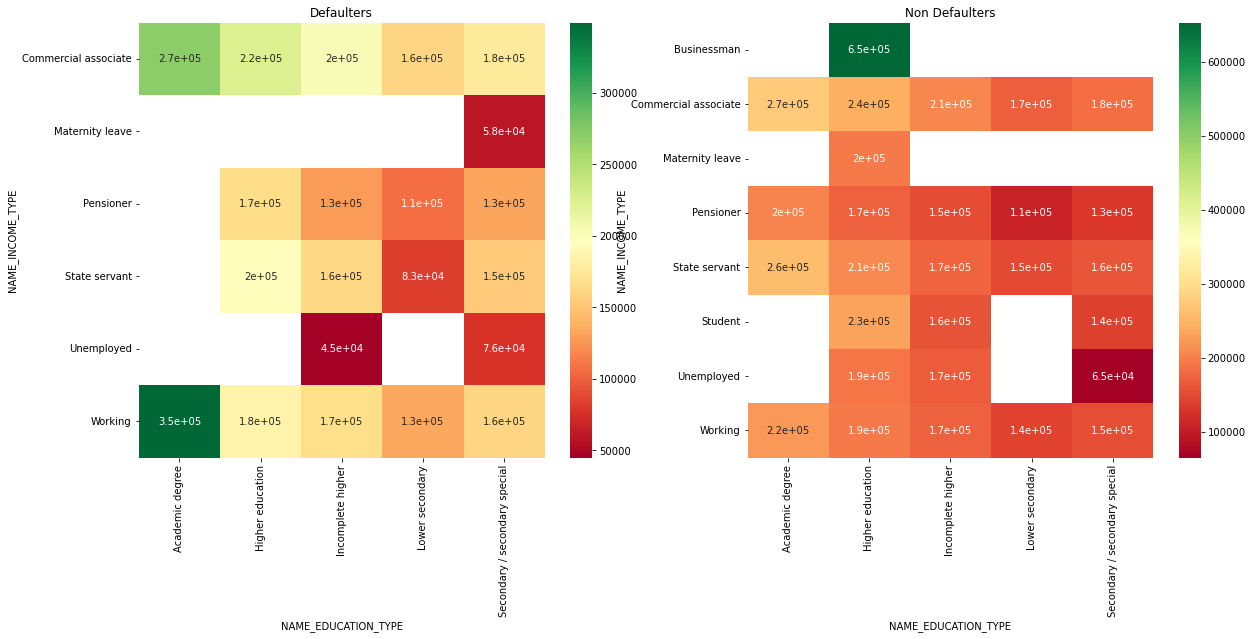

In [63]:
# Showing Heatmap wrt AMT_INCOME_TOTAL
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.heatmap(res_1,annot=True, cmap="RdYlGn")
plt.subplot(1,2,2)
plt.title("Non Defaulters")
sns.heatmap(res_3,annot=True, cmap="RdYlGn")
plt.show()

##### Inference 35 - In case of defaulters, Working and academic degree and Commercial Associate and academic degree have linear dependence whereas maternity leave and secondary special have inverse dependencies. In case of non defaulters, businessman and higher education have linear dependence and secondary and unemployed have inverse relation.

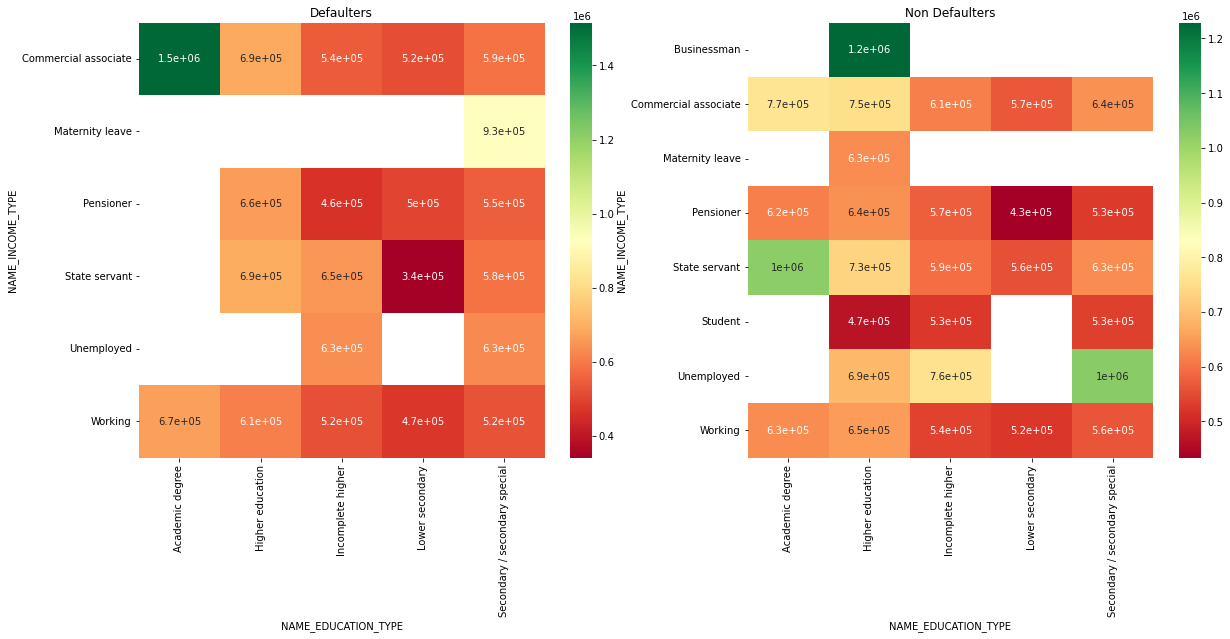

In [64]:
# Showing Heatmap wrt AMT_CREDIT
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.heatmap(res_2,annot=True, cmap="RdYlGn")
plt.subplot(1,2,2)
plt.title("Non Defaulters")
sns.heatmap(res_4,annot=True, cmap="RdYlGn")
plt.show()

##### Inference 36 - In case of defaulters, academic degree and commercial associate have strong linear dependence and lower secondary and state servant are strongly inversely related. In case of non defaulters, higher education and businessmen have linear dependence and pensioners and lower secondary have inverse relationship amongst them.

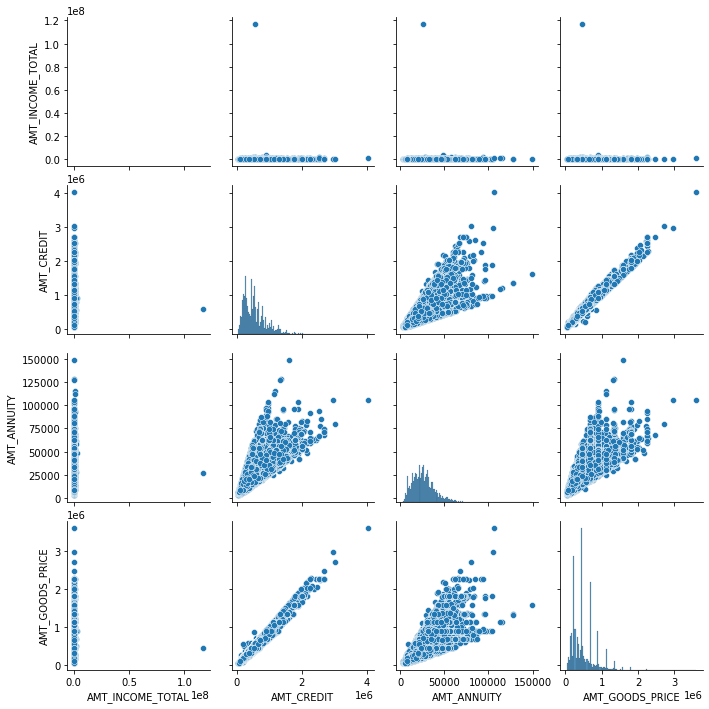

In [65]:
# PLotting pair plot of all numerical columns for defaulters
sns.pairplot(data=appln_data_defaulters,vars=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"])
plt.show()

##### Inference 39 - Amt credit and amt goods price follow a linear relationship amongst them whereas in amt goods price and amt annuity no solid conclusions can be drawn. There is a linear dependence between certain variables.

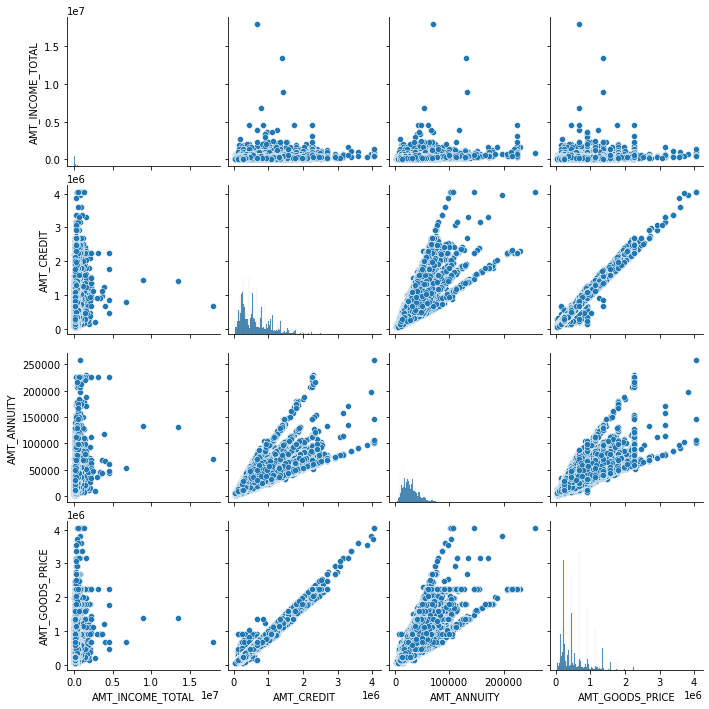

In [66]:
# PLotting pair plot of all numerical columns for non defaulters
sns.pairplot(data=appln_data_non_defaulters,vars=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"])
plt.show()

##### Inference 40 - Amt annuity shows more scattered behavior and less conclusions can be drawn from it. Amt income total and amt goods price show linear dependence.

##  Previous Application Data CSV

### Step 9: Reading the data

In [67]:
# Loading only the desired columns which might affect the Contract Status
prev_appln_data = pd.read_csv("previous_application.csv",usecols = ["SK_ID_PREV",
"SK_ID_CURR",
"NAME_CONTRACT_TYPE",
"AMT_ANNUITY",
"AMT_APPLICATION",
"AMT_CREDIT",
"AMT_GOODS_PRICE",
"RATE_INTEREST_PRIMARY",                                                                    
"RATE_INTEREST_PRIVILEGED",                                                                    
"NAME_CASH_LOAN_PURPOSE",                                                                   
"NAME_CONTRACT_STATUS",
"NAME_SELLER_INDUSTRY"                                                                   
])
prev_appln_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_SELLER_INDUSTRY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,0.182832,0.867336,XAP,Approved,Connectivity
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,NaN,NaN,XNA,Approved,XNA
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,NaN,NaN,XNA,Approved,XNA
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,NaN,NaN,XNA,Approved,XNA
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,NaN,NaN,Repairs,Refused,XNA


In [68]:
# Checking the shape of Application Data loaded
prev_appln_data.shape

(1670214, 12)

In [69]:
# Checking the info of all columns in Application Data 
prev_appln_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 12 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   SK_ID_PREV                1670214 non-null  int64  
 1   SK_ID_CURR                1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE        1670214 non-null  object 
 3   AMT_ANNUITY               1297979 non-null  float64
 4   AMT_APPLICATION           1670214 non-null  float64
 5   AMT_CREDIT                1670213 non-null  float64
 6   AMT_GOODS_PRICE           1284699 non-null  float64
 7   RATE_INTEREST_PRIMARY     5951 non-null     float64
 8   RATE_INTEREST_PRIVILEGED  5951 non-null     float64
 9   NAME_CASH_LOAN_PURPOSE    1670214 non-null  object 
 10  NAME_CONTRACT_STATUS      1670214 non-null  object 
 11  NAME_SELLER_INDUSTRY      1670214 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 152.9+ MB


In [70]:
# Checking the stats of all numerical columns in Application Data 
prev_appln_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,5951.000000,5951.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,0.188357,0.773503
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,0.087671,0.100879
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.034781,0.373150
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,0.160716,0.715645
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,0.189122,0.835095
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,0.193330,0.852537
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,1.000000,1.000000


### Step 10: Finding Missing Values

In [71]:
# Checking the count of Null values in each column
prev_appln_data.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                  372235
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_GOODS_PRICE              385515
RATE_INTEREST_PRIMARY       1664263
RATE_INTEREST_PRIVILEGED    1664263
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
NAME_SELLER_INDUSTRY              0
dtype: int64

In [72]:
# Checking the % of Null values in each column
prev_appln_data.isnull().mean().round(8) * 100

SK_ID_PREV                   0.000000
SK_ID_CURR                   0.000000
NAME_CONTRACT_TYPE           0.000000
AMT_ANNUITY                 22.286665
AMT_APPLICATION              0.000000
AMT_CREDIT                   0.000060
AMT_GOODS_PRICE             23.081773
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
NAME_CASH_LOAN_PURPOSE       0.000000
NAME_CONTRACT_STATUS         0.000000
NAME_SELLER_INDUSTRY         0.000000
dtype: float64

##### Inference 41 - There are 2 columns "RATE_INTEREST_PRIMARY" and "RATE_INTEREST_PRIVILEGED" having Null values greater than 50%. Therefore, will have to drop these column from Dataframe.<br><br> Inference 42 - Thare is only 1 column having small % (ie less than 13%) of Null values - "AMT_CREDIT". Since the number of Null values is significantly very low then we can impute them with 0 or delete the whole rows and thus will not affect the final result.<br><br> Inference 43 - There are 2 column "AMT_ANNUITY" and "AMT_GOODS_PRICE" which lies in the range of 13-50% of Null values. Since the Null values are in moderate range, we can impute the Null values with median value.

In [73]:
# Dropping column "RATE_INTEREST_PRIMARY" and "RATE_INTEREST_PRIVILEGED" from Dataframe
prev_appln_data = prev_appln_data.drop(['RATE_INTEREST_PRIMARY'], axis=1)
prev_appln_data = prev_appln_data.drop(['RATE_INTEREST_PRIVILEGED'], axis=1)

In [74]:
# Checking the shape of updated Previous Application Data Dataframe
prev_appln_data.shape

(1670214, 10)

### Step 11: Checking Datatypes

In [75]:
# Checking Datatypes of each column
prev_appln_data.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NAME_CONTRACT_TYPE         object
AMT_ANNUITY               float64
AMT_APPLICATION           float64
AMT_CREDIT                float64
AMT_GOODS_PRICE           float64
NAME_CASH_LOAN_PURPOSE     object
NAME_CONTRACT_STATUS       object
NAME_SELLER_INDUSTRY       object
dtype: object

In [76]:
# Changing Datatype of column "SK_ID_PREV" and "SK_ID_CURR"as they are Id columns and will not be used for mathematical calculations
prev_appln_data['SK_ID_PREV'] = prev_appln_data['SK_ID_PREV'].astype(object)
prev_appln_data['SK_ID_CURR'] = prev_appln_data['SK_ID_CURR'].astype(object)

In [77]:
# Printing the data after making changes
prev_appln_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_SELLER_INDUSTRY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Connectivity
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,XNA
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,XNA
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,XNA
...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,XAP,Approved,Furniture
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,XAP,Approved,Furniture
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,Consumer electronics
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,XNA


### Step 4: Finding Outliers Values

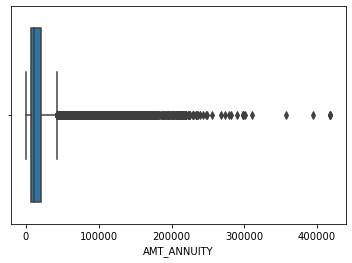

In [78]:
# Checking Outliers in column "AMT_ANNUITY"
sns.boxplot(prev_appln_data.AMT_ANNUITY)
plt.show()

In [79]:
prev_appln_data.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95, 0.99,1])

0.50     11250.0000
0.70     17783.1270
0.90     34703.8200
0.95     45336.7800
0.99     69685.7886
1.00    418058.1450
Name: AMT_ANNUITY, dtype: float64

##### Inference 44 - Clearly it is shown using Boxplot and calculating quantiles, outliers exist in column "AMT_ANNUITY". Outliers can be removed by filtering the data ie keeping the data upto a certain number (say 99 percentile). Above it, there is much variation in data.

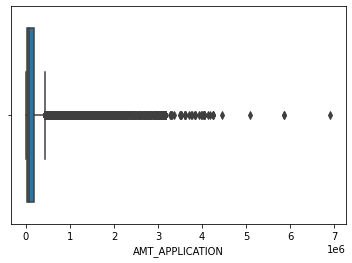

In [80]:
# Checking Outliers in column "AMT_APPLICATION"
sns.boxplot(prev_appln_data.AMT_APPLICATION)
plt.show()

In [81]:
prev_appln_data.AMT_APPLICATION.quantile([0.1,0.25,0.5, 0.7, 0.9, 0.95, 0.99,1])

0.10          0.0
0.25      18720.0
0.50      71046.0
0.70     144769.5
0.90     450000.0
0.95     787500.0
0.99    1350000.0
1.00    6905160.0
Name: AMT_APPLICATION, dtype: float64

##### Inference 45 - Clearly it is shown using Boxplot and calculating quantiles, outliers exist at both end in column "AMT_APPLICATION". Outliers can be removed by filtering the data ie keeping the data between certain numbers (say 25 amd 90 percentile). Above 90 and below 25 it, there is much variation in data.

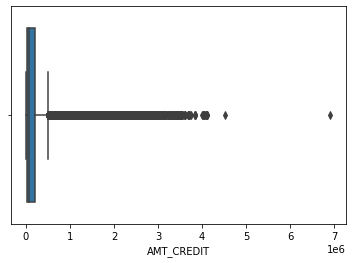

In [82]:
# Checking Outliers in column "AMT_CREDIT"
sns.boxplot(prev_appln_data.AMT_CREDIT)
plt.show()

In [83]:
prev_appln_data.AMT_CREDIT.quantile([0.1,0.25,0.5, 0.7, 0.9, 0.95, 0.99,1])

0.10          0.0
0.25      24160.5
0.50      80541.0
0.70     167895.0
0.90     533160.0
0.95     886500.0
0.99    1515377.7
1.00    6905160.0
Name: AMT_CREDIT, dtype: float64

##### Inference 46 - Clearly it is shown using Boxplot and calculating quantiles, outliers exist at both end in column "AMT_APPLICATION". Outliers can be removed by filtering the data ie keeping the data between certain numbers (say 25 amd 90 percentile). Above 90 and below 25 it, there is much variation in data.

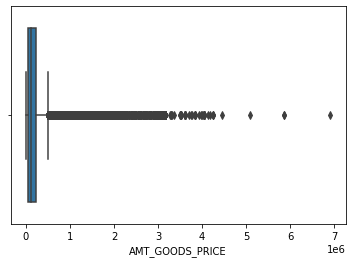

In [84]:
# Checking Outliers in column "AMT_GOODS_PRICE"
sns.boxplot(prev_appln_data.AMT_GOODS_PRICE)
plt.show()

In [85]:
prev_appln_data.AMT_GOODS_PRICE.quantile([0.5, 0.7, 0.9, 0.95, 0.99,1])

0.50     112320.0
0.70     211500.0
0.90     585000.0
0.95     900000.0
0.99    1395000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

##### Inference 47 - Clearly it is shown using Boxplot and calculating quantiles, outliers exist in column "AMT_GOODS_PRICE". Outliers can be removed by filtering the data ie keeping the data upto a certain number (say 90 percentile). Above it, there is much variation in data.

### Step 12: Check Data Imbalance

In [86]:
# Check data imbalance in column "NAME_CONTRACT_STATUS"
prev_appln_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

##### Inference 48 - We can clearly see there is a data imbalace in column "NAME_CONTRACT_STATUS". <br> "Approved" value are high in number (62% approx) , "Canceled" is (19% approx), "Refused" is (17.5% approx) and "Unused offer" is (1.5% approx).<br> Treatment - This can be fixed by using random sampling method ie selecting the data at random instead of using population data.

### Step 13: Univariate Analysis

In [87]:
prev_appln_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_SELLER_INDUSTRY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Connectivity
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,XNA
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,XNA
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,XNA
...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,XAP,Approved,Furniture
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,XAP,Approved,Furniture
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,Consumer electronics
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,XNA


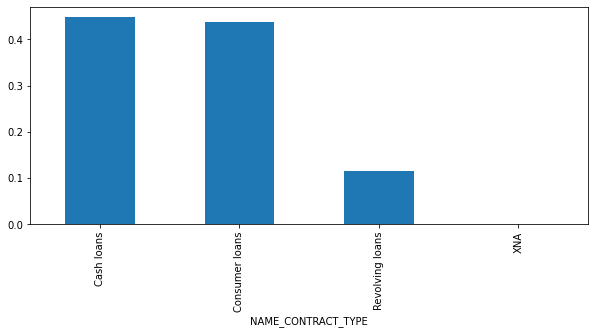

In [88]:
# Analysis of column "NAME_CONTRACT_TYPE"
plt.figure(figsize=[10,4])
plt.xlabel("NAME_CONTRACT_TYPE")
prev_appln_data.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 49 - As clearly shown, "Cash loans" and "Consumer loans" have almost same number of count whereas "Revolving loans" has very low number of count. There are also missing values in column - "XNA" which can be handled by imputation with most popular category or removing the whole rows completely from Dataframe.

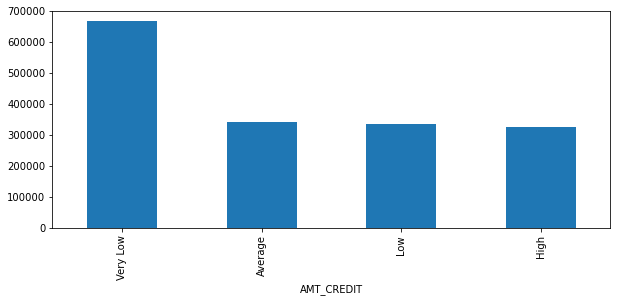

In [89]:
# Analysis of column "AMT_CREDIT"
plt.figure(figsize=[10,4])
plt.xlabel("AMT_CREDIT")
pd.qcut(prev_appln_data['AMT_CREDIT'],q=[0, .2, .4, .6, .8, 1],labels=['Very Low', 'Low', 'Average', 'High'],duplicates='drop').value_counts().plot(kind='bar')
plt.show()

##### Inference 50 - Based on our analysis we can conclude that, People who took low amount of loan are high in number

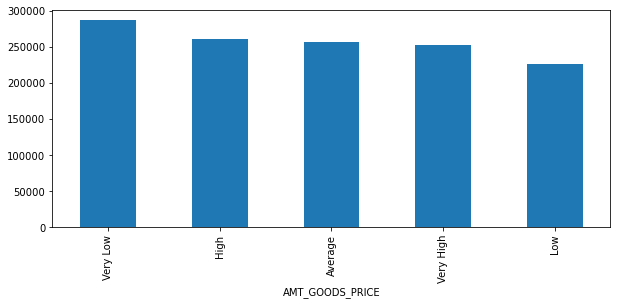

In [90]:
# Analysis of column "AMT_GOODS_PRICE"
plt.figure(figsize=[10,4])
plt.xlabel("AMT_GOODS_PRICE")
pd.qcut(prev_appln_data['AMT_GOODS_PRICE'],q=[0, .2, .4, .6, .8, 1],labels=['Very Low','Low', 'Average', 'High','Very High']).value_counts().plot(kind='bar')
plt.show()

##### Inference 51 - Based on our analysis we can conclude that, People who took loan for low amount of good are high in number

In [91]:
# Analysis of column "NAME_CASH_LOAN_PURPOSE"
prev_appln_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

##### Inference 52 - Since there are many missing values - XAP and XNA. Rest values are very less in number, then we need to drop this column

In [92]:
# Dropping column "NAME_CASH_LOAN_PURPOSE"
prev_appln_data = prev_appln_data.drop(['NAME_CASH_LOAN_PURPOSE'], axis=1)

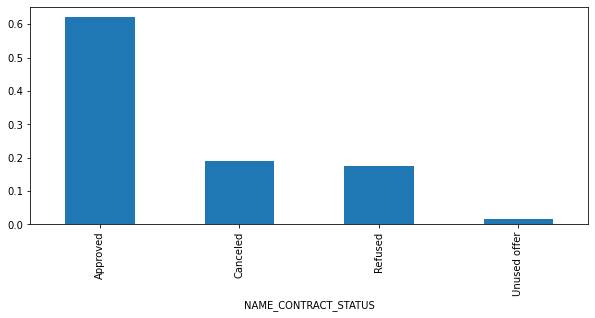

In [93]:
# Analysis of column "NAME_CONTRACT_STATUS"
plt.figure(figsize=[10,4])
plt.xlabel("NAME_CONTRACT_STATUS")
prev_appln_data.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

##### Inference 53 - Most of the applications were "Approved" followed by "Canceled" then "Refused" and least count is of "Unused Offer"

In [94]:
# Analysis of column "NAME_SELLER_INDUSTRY"
prev_appln_data.NAME_SELLER_INDUSTRY.value_counts(normalize=True)

XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: NAME_SELLER_INDUSTRY, dtype: float64

##### Inference 54 - Since there are many missing values - XNA. Rest values are very less in number, then we need to drop this column also.

In [95]:
# Dropping column "NAME_SELLER_INDUSTRY"
prev_appln_data = prev_appln_data.drop(['NAME_SELLER_INDUSTRY'], axis=1)

In [96]:
prev_appln_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Approved
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused
...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,Approved
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,Approved
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,Approved
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,Approved


In [97]:
prev_appln_data.shape

(1670214, 8)

### Step 14: Bivariate Analysis

<Figure size 1080x432 with 0 Axes>

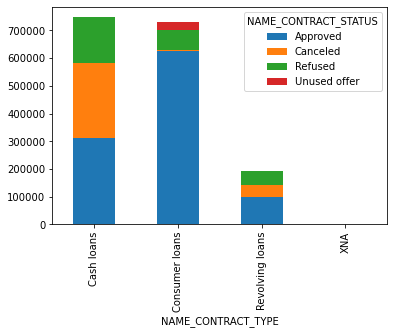

In [98]:
# Analysis of column "NAME_CONTRACT_TYPE" and "NAME_CONTRACT_STATUS"
plt.figure(figsize=[15,6])
pd.pivot_table(data=prev_appln_data, index="NAME_CONTRACT_TYPE", columns="NAME_CONTRACT_STATUS", values="SK_ID_PREV", aggfunc="count").plot.bar(stacked="True")
plt.show()

##### Inference 55 - Based on our analysis we can conclude that, Consumer Loans are getting more approved than other types of contract type. Also Cash loans are getting more refused than other types of contract.

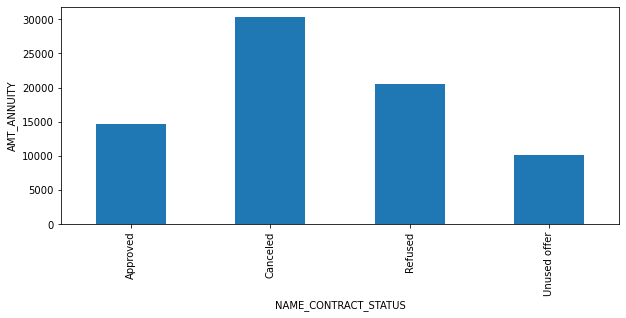

In [99]:
# Analysis of column "NAME_CONTRACT_STATUS" and "AMT_ANNUITY"
plt.figure(figsize=[10,4])
plt.ylabel("AMT_ANNUITY")
prev_appln_data.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY"].mean().plot.bar()
plt.show()

##### Inference 56 - Based on our analysis we can conclude that, loan with high annuity are getting cancelled whereas loan with low annuity are getting unused.

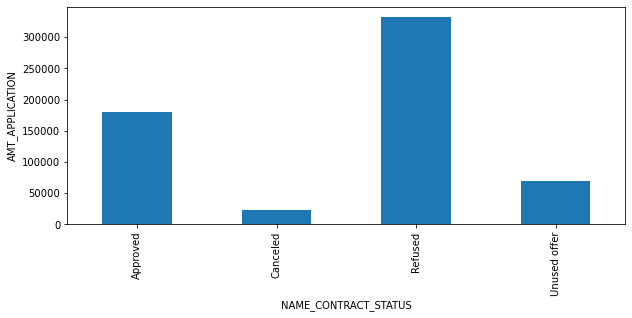

In [100]:
# Analysis of column "NAME_CONTRACT_STATUS" and "AMT_APPLICATION"
plt.figure(figsize=[10,4])
plt.ylabel("AMT_APPLICATION")
prev_appln_data.groupby("NAME_CONTRACT_STATUS")["AMT_APPLICATION"].mean().plot.bar()
plt.show()

##### Inference 57 - Based on our analysis we can conclude that, loan with high amount of application are getting refused whereas loan with low amount of application are getting cancelled. Approved loan have average amount of application.

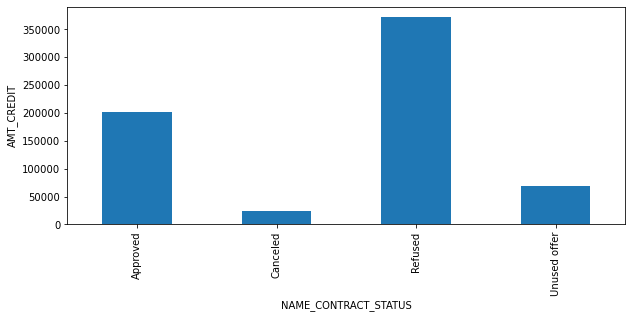

In [101]:
# Analysis of column "NAME_CONTRACT_STATUS" and "AMT_CREDIT"
plt.figure(figsize=[10,4])
plt.ylabel("AMT_CREDIT")
prev_appln_data.groupby("NAME_CONTRACT_STATUS")["AMT_CREDIT"].mean().plot.bar()
plt.show()

##### Inference 58 - Based on our analysis we can conclude that, loan with high amount of credit are getting refused whereas loan with low amount of credit are getting cancelled. Approved loan have average amount of credit.

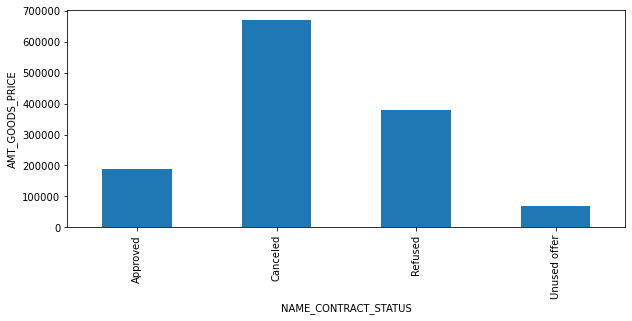

In [102]:
# Analysis of column "NAME_CONTRACT_STATUS" and "AMT_GOODS_PRICE"
plt.figure(figsize=[10,4])
plt.ylabel("AMT_GOODS_PRICE")
prev_appln_data.groupby("NAME_CONTRACT_STATUS")["AMT_GOODS_PRICE"].mean().plot.bar()
plt.show()

##### Inference 59 - Based on our analysis we can conclude that, loan for high amount of goods are getting cancelled whereas loan for low amount of goods are getting unused.

### Step 14: Multivariate Analysis

In [103]:
prev_appln_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Approved
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused


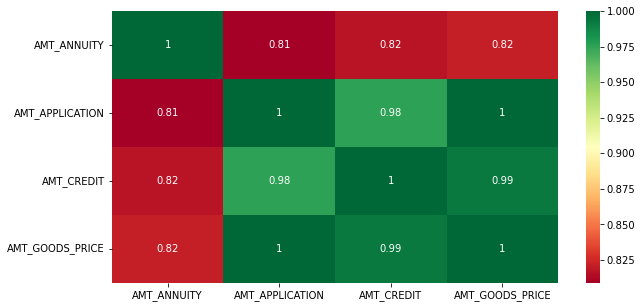

In [104]:
# Plotting heatmap b/w all numerical columns
plt.figure(figsize=[10,5])
sns.heatmap(prev_appln_data[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]].corr(),annot=True,cmap="RdYlGn")
plt.show()

##### Inference 60 - We can analyze from graph that, "AMT_GOODS_PRICE and AMT_APPLICATION", "AMT_GOODS_PRICE and AMT_CREDIT", "AMT_CREDIT and AMT_APPLICATION" have stronger correlation where as correaltion of "AMT_ANNUITY" with other columns have weaker relationship.

In [105]:
# Creating Pivot b/w column "NAME_CONTRACT_STATUS" and "NAME_CONTRACT_TYPE" with value "AMT_ANNUITY"
prev_res_1 = pd.pivot_table(data=prev_appln_data, index="NAME_CONTRACT_STATUS", columns="NAME_CONTRACT_TYPE", values="AMT_ANNUITY", aggfunc="mean")
# Creating Pivot b/w column "NAME_CONTRACT_STATUS" and "NAME_CONTRACT_TYPE" with value "AMT_APPLICATION"
prev_res_2 = pd.pivot_table(data=prev_appln_data, index="NAME_CONTRACT_STATUS", columns="NAME_CONTRACT_TYPE", values="AMT_APPLICATION", aggfunc="mean")
# Creating Pivot b/w column "NAME_CONTRACT_STATUS" and "NAME_CONTRACT_TYPE" with value "AMT_CREDIT"
prev_res_3 = pd.pivot_table(data=prev_appln_data, index="NAME_CONTRACT_STATUS", columns="NAME_CONTRACT_TYPE", values="AMT_CREDIT", aggfunc="mean")
# Creating Pivot b/w column "NAME_CONTRACT_STATUS" and "NAME_CONTRACT_TYPE" with value "AMT_GOODS_PRICE"
prev_res_4 = pd.pivot_table(data=prev_appln_data, index="NAME_CONTRACT_STATUS", columns="NAME_CONTRACT_TYPE", values="AMT_GOODS_PRICE", aggfunc="mean")

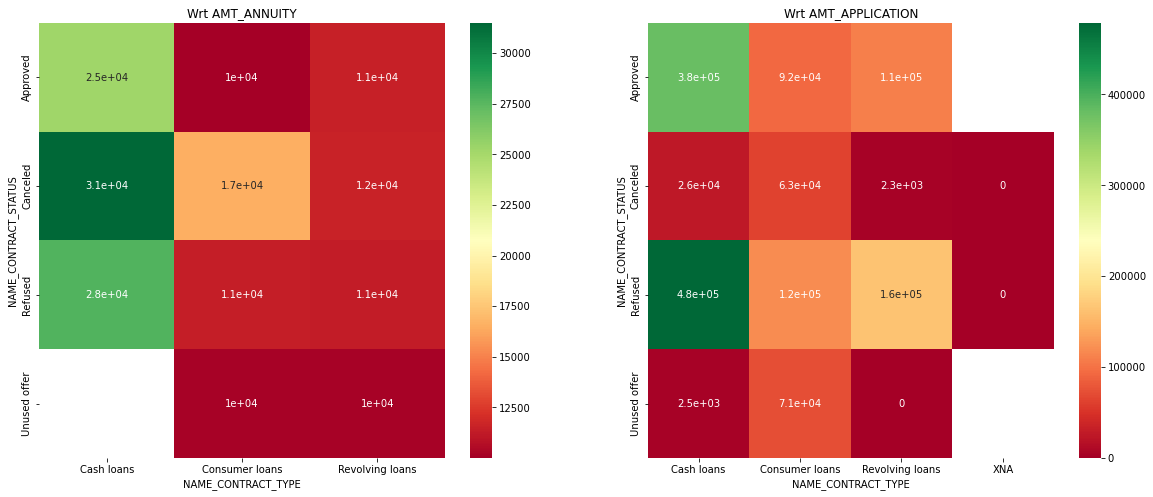

In [106]:
# Showing Heatmap
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Wrt AMT_ANNUITY")
sns.heatmap(prev_res_1,annot=True, cmap="RdYlGn")
plt.subplot(1,2,2)
plt.title("Wrt AMT_APPLICATION")
sns.heatmap(prev_res_2,annot=True, cmap="RdYlGn")
plt.show()

##### Inference 61 - Refused, credited and approved cash loans have more values w.r.t. amt_annuity. Refused and approved cash loans have more values w.r.t. amt_application and refused and credited loans have low values.

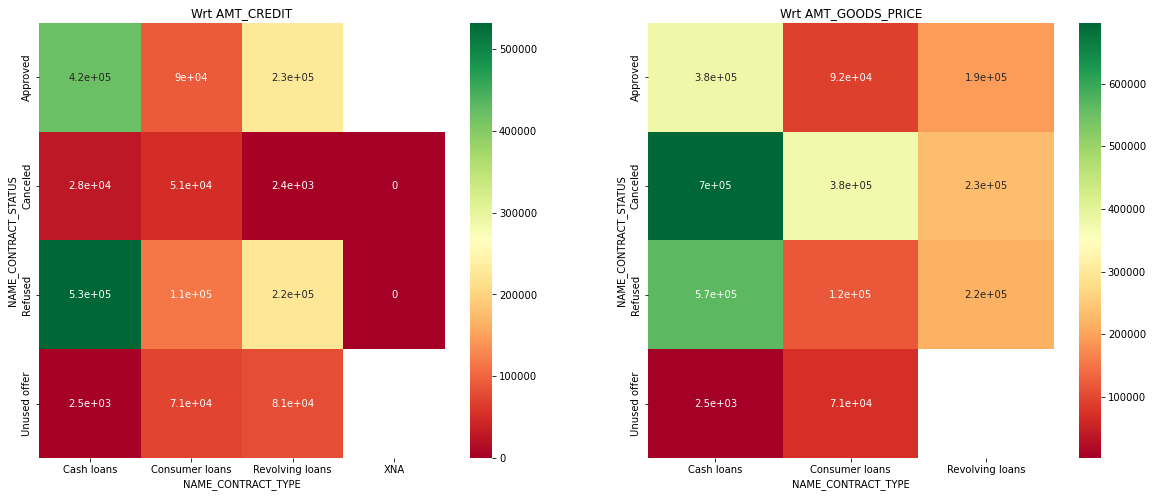

In [107]:
# Showing Heatmap
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title("Wrt AMT_CREDIT")
sns.heatmap(prev_res_3,annot=True, cmap="RdYlGn")
plt.subplot(1,2,2)
plt.title("Wrt AMT_GOODS_PRICE")
sns.heatmap(prev_res_4,annot=True, cmap="RdYlGn")
plt.show()

##### Inference 62 - Refused and approved cash loans have more value w.r.t. AMT_CREDIT whereas credited and refused revolving loans have low values. Refused and credited cash loans have high values whereas Ununsed offer and cash loans have low values w.r.t. AMT_GOODS_PRICE.

## Merging both "application_data" and "previous_application" Data

### Step 15: Reading Data

In [108]:
# Reading "application_data"
appln_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,Core staff,1.0,Religion


In [109]:
# Reading "previous_application"
prev_appln_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Approved
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused


### Step 16: Joining Data

In [110]:
merge_data = pd.merge(left=prev_appln_data, right=appln_data, how="inner", on="SK_ID_CURR")
merge_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_CONTRACT_STATUS,TARGET,NAME_CONTRACT_TYPE_y,...,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,0,Cash loans,...,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,39,NaN,3.0,Military
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,1800000.0,Refused,0,Cash loans,...,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,39,NaN,3.0,Military
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,108400.5,Approved,0,Cash loans,...,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,39,NaN,3.0,Military
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved,0,Revolving loans,...,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,58,Private service staff,2.0,Self-employed
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,450000.0,Approved,0,Revolving loans,...,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,58,Private service staff,2.0,Self-employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1261221,277978,Consumer loans,6030.675,133866.0,133866.0,133866.0,Approved,0,Cash loans,...,22527.0,454500.0,State servant,Secondary / secondary special,Widow,House / apartment,62,Sales staff,1.0,Trade: type 7
1413697,1563733,227766,Consumer loans,13726.080,137250.0,123525.0,137250.0,Approved,0,Cash loans,...,21888.0,508500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,56,NaN,1.0,XNA
1413698,2319569,239799,Consumer loans,4716.495,46800.0,46800.0,46800.0,Approved,0,Cash loans,...,23373.0,414000.0,Pensioner,Secondary / secondary special,Separated,Municipal apartment,50,NaN,1.0,XNA
1413699,2829648,353284,Consumer loans,10301.940,101745.0,112491.0,101745.0,Approved,0,Cash loans,...,18904.5,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,57,Laborers,2.0,Self-employed


In [111]:
merge_data.shape

(1413701, 26)

In [112]:
merge_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1413701 non-null  object 
 1   SK_ID_CURR            1413701 non-null  object 
 2   NAME_CONTRACT_TYPE_x  1413701 non-null  object 
 3   AMT_ANNUITY_x         1106483 non-null  float64
 4   AMT_APPLICATION       1413701 non-null  float64
 5   AMT_CREDIT_x          1413700 non-null  float64
 6   AMT_GOODS_PRICE_x     1094176 non-null  float64
 7   NAME_CONTRACT_STATUS  1413701 non-null  object 
 8   TARGET                1413701 non-null  int64  
 9   NAME_CONTRACT_TYPE_y  1413701 non-null  object 
 10  CODE_GENDER           1413701 non-null  object 
 11  FLAG_OWN_CAR          1413701 non-null  object 
 12  FLAG_OWN_REALTY       1413701 non-null  object 
 13  CNT_CHILDREN          1413701 non-null  int64  
 14  AMT_INCOME_TOTAL      1413701 non-

In [113]:
merge_data.describe()

,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,DAYS_BIRTH,CNT_FAM_MEMBERS
count,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06
mean,1.583718e+04,1.752436e+05,1.963541e+05,2.264512e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,4.421384e+01,2.150501e+00
std,1.472491e+04,2.936222e+05,3.194813e+05,3.159376e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.190217e+01,9.006787e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.000000e+01,1.000000e+00
25%,6.257858e+03,1.975050e+04,2.488050e+04,4.982850e+04,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,3.400000e+01,2.000000e+00
50%,1.122376e+04,7.087050e+04,8.059500e+04,1.102455e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,4.300000e+01,2.000000e+00
75%,2.042078e+04,1.800000e+05,2.156400e+05,2.295000e+05,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,5.400000e+01,3.000000e+00
max,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,6.900000e+01,2.000000e+01


### Step 17: Analysing Merged Data

In [114]:
merge_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,NAME_CONTRACT_STATUS,TARGET,NAME_CONTRACT_TYPE_y,...,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,0,Cash loans,...,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,39,NaN,3.0,Military
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,1800000.0,Refused,0,Cash loans,...,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,39,NaN,3.0,Military
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,108400.5,Approved,0,Cash loans,...,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,39,NaN,3.0,Military
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved,0,Revolving loans,...,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,58,Private service staff,2.0,Self-employed
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,450000.0,Approved,0,Revolving loans,...,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,58,Private service staff,2.0,Self-employed


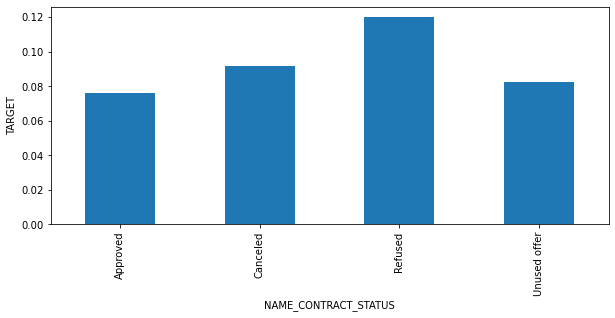

In [115]:
# Analysis of column "NAME_CONTRACT_STATUS" and "TARGET"
plt.figure(figsize=[10,4])
plt.xlabel("NAME_CONTRACT_STATUS")
plt.ylabel("TARGET")
merge_data.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().plot.bar()
plt.show()

##### Inference 63 - People who got refused in previous application were most likely to default where as people who got approved were less likely to default comparetively.

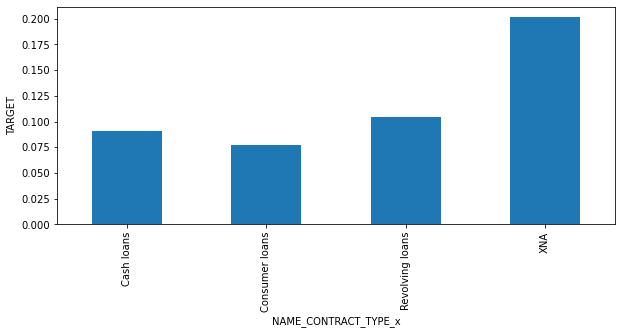

In [116]:
# Analysis of column "NAME_CONTRACT_TYPE" and "TARGET"
plt.figure(figsize=[10,4])
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("TARGET")
merge_data.groupby("NAME_CONTRACT_TYPE_x")["TARGET"].mean().plot.bar()
plt.show()

##### Inference 64 - People who applied for "Revolving loans" in previous application were most likely to default where as people who applied for "Consumer loans" were less likely to default comparetively.

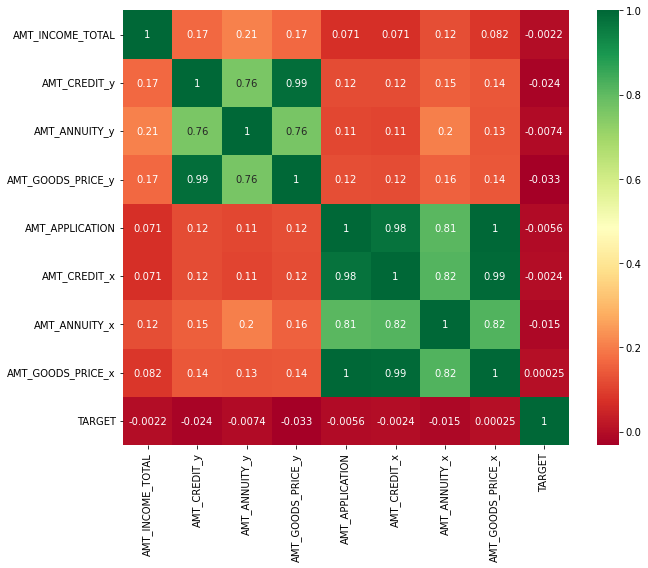

In [117]:
# Plotting heatmap b/w all numerical columns
plt.figure(figsize=[10,8])
sns.heatmap(merge_data[["AMT_INCOME_TOTAL","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y","AMT_APPLICATION","AMT_CREDIT_x","AMT_ANNUITY_x","AMT_GOODS_PRICE_x","TARGET"]].corr(),annot=True,cmap="RdYlGn")
plt.show()

##### Inference 65 - We can conclude that, "AMT_INCOME_TOTAL", "AMT_APPLICATION", "AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE"  have no positive correlation with "TARGET" variable.

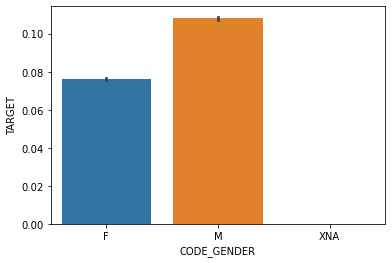

In [118]:
# Analysis of column "CODE_GENDER" and "TARGET"
sns.barplot(data=merge_data, x="CODE_GENDER",y="TARGET")
plt.show()

##### Inference 66 - We can conclude that, Male people are more likely to default than Female.

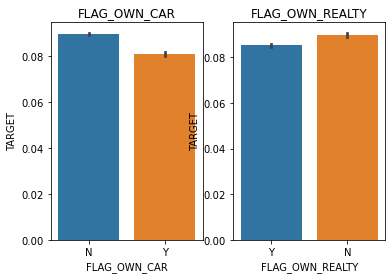

In [119]:
# Analysis of column "FLAG_OWN_CAR","FLAG_OWN_REALTY" and "TARGET"
plt.subplot(1,2,1)
plt.title("FLAG_OWN_CAR")
sns.barplot(data=merge_data, x="FLAG_OWN_CAR",y="TARGET")
plt.subplot(1,2,2)
plt.title("FLAG_OWN_REALTY")
sns.barplot(data=merge_data, x="FLAG_OWN_REALTY",y="TARGET")
plt.show()

##### Inference 67 - We can conclude that, People who don't own car or realty are more like to default then people who owns them.

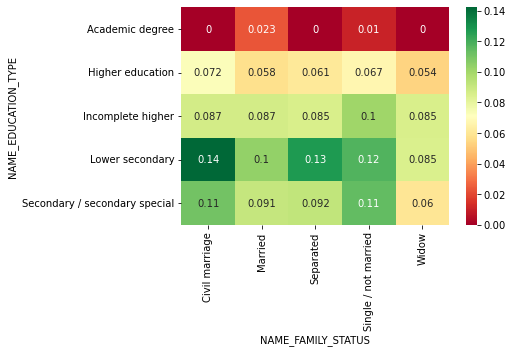

In [120]:
# Creating Pivots b/w column "NAME_EDUCATION_TYPE" and "NAME_FAMILY_STATUS" with value "TARGET"
merge_res_1 = pd.pivot_table(data=merge_data,index="NAME_EDUCATION_TYPE",columns="NAME_FAMILY_STATUS",values="TARGET",aggfunc="mean")
sns.heatmap(merge_res_1,annot=True, cmap="RdYlGn")
plt.show()

##### Inference 68 - We can conclude that, People who have studied upto "Lower secondary" and who have done "Civil marriage" are more likely to default than others.